In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import glob

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('max_colwidth',150)

# Microsoft Emotion API Data
## Images were placed into the API by hand since there were so few. This step was automated using the API for the Baseline data

In [2]:
def read_jsons(f, candidate):
   
    tmp_dict = {}
    with open(f) as json_file:    
        data = json.load(json_file)
        for i in data[0]['scores']:
            if data[0]['scores'][i] > 0.55:   # confidence score threshold. 
                tmp_dict[i] = data[0]['scores'][i]
            else: tmp_dict[i] = np.nan
                
        tmp_dict['image_file'] = f.split('/')[-1]    
        
        return tmp_dict

In [3]:
basefilepath = './MicrosoftEmotionAPI/'

def get_json(path, candidate):
    
    for f in glob.glob(path + '*.json'):
        #print(f)
        if candidate in f:
            row_list.append(read_jsons(f, candidate))

In [4]:
row_list = []
get_json(basefilepath, 'hillary_clinton')
HCDF = pd.DataFrame(row_list)  

In [5]:
HCDF.head(11)

,anger,contempt,disgust,fear,happiness,image_file,neutral,sadness,surprise
0,NaN,NaN,NaN,NaN,1.000000,4352_1_hillary_clinton_1_googleplus_ 861e1f37179f0e8c.json,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.000000,4352_2_hillary_clinton_2_wikipedia_ 764fce5e4be6b6d2_SMALLER.json,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.999941,4352_3_hillary_clinton_3_russiainsider_ 2f1e0e0e1f1b1b9b.json,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,4352_4_hillary_clinton_4_cnn_ 96970f0706064e86.json,0.792941,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,4352_5_hillary_clinton_5_youtube_ 983d7d1c3c1c1c6f.json,NaN,NaN,0.641825
5,NaN,NaN,NaN,NaN,0.854808,4509_31_hillary_clinton_6_biography_decfc7c7cec6cecc.json,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,0.603577,5013_29_hillary_clinton_5_time_ c7cbc787c7c72d2c.json,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,0.927040,5733_30_hillary_clinton_6_mises_ 4f9f8f0f172a4acd.json,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,1.000000,5805_30_hillary_clinton_6_politico_ 27464666644d5434.json,NaN,NaN,NaN


## Plotting sentiment for each image.

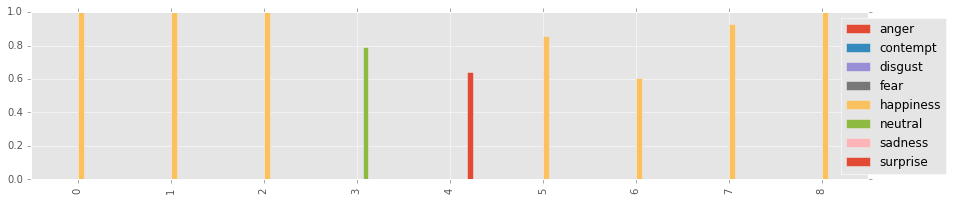

In [6]:
HCDF.plot(kind='bar', ylim=(0,1))
plt.legend(bbox_to_anchor=(1.1, 1))

In [7]:
row_list = []
get_json(basefilepath, 'donald_trump')
DTDF = pd.DataFrame(row_list)  
DTDF.head(12)

,anger,contempt,disgust,fear,happiness,image_file,neutral,sadness,surprise
0,NaN,NaN,NaN,NaN,NaN,4353_21_donald_trump_1_googleplus_ eec7c3ebd3726569.json,0.682655,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,4353_22_donald_trump_2_wikipedia_ 0c8686168ca4ae2d.json,0.848894,NaN,NaN
2,NaN,NaN,NaN,NaN,0.887991,4353_23_donald_trump_3_businessinsider_ cdcf4e4e4d4dcd9d.json,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,4353_24_donald_trump_4_snopes_ 4d4d0f4e465b4b8c.json,0.873584,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,4353_25_donald_trump_5_theodysseyonline_headlinepolitics_ 9b1919199999993a.json,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4353_26_donald_trump_6_slate_ 961b1b191999363e.json,0.981299,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,4436_10_donald_trump_6_cnn_ 8e8686064e4f4745.json,NaN,NaN,NaN
7,0.664931,NaN,NaN,NaN,NaN,4580_10_donald_trump_6_wonkette_ 961a1a1b8bcb9e9b.json,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,5084_5_donald_trump_2_wikipedia_ 1d8e9e948cacad4d.json,0.931672,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5372_6_donald_trump_3_slate_reddit_ cb49890dce9e9495.json,0.654215,NaN,NaN


## Plotting sentiment for each image

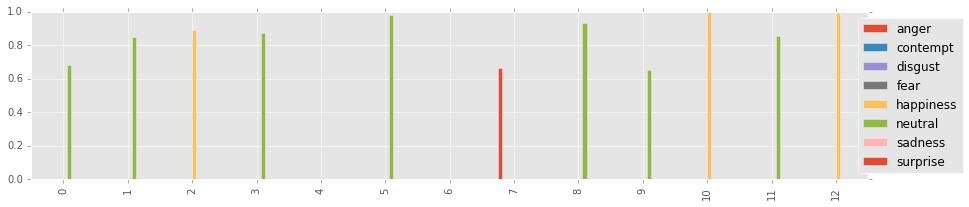

In [8]:
DTDF.plot(kind='bar',ylim=(0,1))
plt.legend(bbox_to_anchor=(1.12, 1))

# Microsoft Face API

In [9]:
def read_jsons_faceAPI(f, candidate):
   
    tmp_dict = {}
    with open(f) as json_file:    
        data = json.load(json_file)
        if data[0]['faceAttributes']['smile'] > 0.55:
            tmp_dict['smile'] = data[0]['faceAttributes']['smile']
        else: tmp_dict['smile'] = np.nan
        tmp_dict['age'] = data[0]['faceAttributes']['age']
        tmp_dict['image_file'] = f.split('/')[-1]
        
        return tmp_dict

In [10]:
basefilepath = './MicrosoftFaceAPI/'

def get_json(path, candidate):
    
    for f in glob.glob(path + '*.json'):
        #print(f)
        if candidate in f:
            row_list.append(read_jsons_faceAPI(f, candidate))

In [11]:
row_list = []
get_json(basefilepath, 'hillary_clinton')
HC_Face = pd.DataFrame(row_list)  

In [12]:
HC_Face

,age,image_file,smile
0,51.8,4352_1_hillary_clinton_1_googleplus_ 861e1f37179f0e8c.json,1.000
1,48.6,4352_2_hillary_clinton_2_wikipedia_ 764fce5e4be6b6d2_SMALLER.json,1.000
2,47.4,4352_3_hillary_clinton_3_russiainsider_ 2f1e0e0e1f1b1b9b.json,1.000
3,51.1,4352_4_hillary_clinton_4_cnn_ 96970f0706064e86.json,NaN
4,55.7,4352_5_hillary_clinton_5_youtube_ 983d7d1c3c1c1c6f.json,NaN
5,48.4,4509_31_hillary_clinton_6_biography_decfc7c7cec6cecc.json,0.736
6,57.7,5013_29_hillary_clinton_5_time_ c7cbc787c7c72d2c.json,NaN
7,55.2,5733_30_hillary_clinton_6_mises_ 4f9f8f0f172a4acd.json,0.999
8,56.3,5805_30_hillary_clinton_6_politico_ 27464666644d5434.json,1.000


In [13]:
HC_Face.mean()     # Current actual age = 68

age      52.466667
smile     0.955833
dtype: float64

In [14]:
HC_Face.sort_values(by='smile', ascending=False)

,age,image_file,smile
0,51.8,4352_1_hillary_clinton_1_googleplus_ 861e1f37179f0e8c.json,1.000
1,48.6,4352_2_hillary_clinton_2_wikipedia_ 764fce5e4be6b6d2_SMALLER.json,1.000
2,47.4,4352_3_hillary_clinton_3_russiainsider_ 2f1e0e0e1f1b1b9b.json,1.000
8,56.3,5805_30_hillary_clinton_6_politico_ 27464666644d5434.json,1.000
7,55.2,5733_30_hillary_clinton_6_mises_ 4f9f8f0f172a4acd.json,0.999
5,48.4,4509_31_hillary_clinton_6_biography_decfc7c7cec6cecc.json,0.736
3,51.1,4352_4_hillary_clinton_4_cnn_ 96970f0706064e86.json,NaN
4,55.7,4352_5_hillary_clinton_5_youtube_ 983d7d1c3c1c1c6f.json,NaN
6,57.7,5013_29_hillary_clinton_5_time_ c7cbc787c7c72d2c.json,NaN


In [15]:
row_list = []
get_json(basefilepath, 'donald_trump')
DT_Face = pd.DataFrame(row_list)
DT_Face.mean()         #  Current actual age = 70

age      66.446154
smile     0.933000
dtype: float64

In [16]:
DT_Face.sort_values(by='smile', ascending=False)

,age,image_file,smile
10,58.8,5588_8_donald_trump_5_nationalreview_ 1e3e3e3f3b169b93.json,1.000
12,70.6,6092_9_donald_trump_6_businessinsider_ 8d0e06060e0c2d8d.json,0.951
2,76.0,4353_23_donald_trump_3_businessinsider_ cdcf4e4e4d4dcd9d.json,0.848
0,60.3,4353_21_donald_trump_1_googleplus_ eec7c3ebd3726569.json,NaN
1,64.5,4353_22_donald_trump_2_wikipedia_ 0c8686168ca4ae2d.json,NaN
3,61.5,4353_24_donald_trump_4_snopes_ 4d4d0f4e465b4b8c.json,NaN
4,68.3,4353_25_donald_trump_5_theodysseyonline_headlinepolitics_ 9b1919199999993a.json,NaN
5,65.6,4353_26_donald_trump_6_slate_ 961b1b191999363e.json,NaN
6,70.6,4436_10_donald_trump_6_cnn_ 8e8686064e4f4745.json,NaN
7,73.5,4580_10_donald_trump_6_wonkette_ 961a1a1b8bcb9e9b.json,NaN
